<a href="https://colab.research.google.com/github/AlirezaAhadipour/PyTorch-deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

### Data

Use a linear regression formula to make a straight line with **known** parameters.

In [3]:
# Params
weight = 0.85
bias = 0.2

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2170],
         [0.2340],
         [0.2510],
         [0.2680],
         [0.2850],
         [0.3020],
         [0.3190],
         [0.3360],
         [0.3530]]))

### Train/test split

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
  plt.figure()
  plt.scatter(train_data, train_labels, color='blue', label='train')
  plt.scatter(test_data, test_labels, color='green', label='test')

  if predictions is not None:
    plt.scatter(test_data, predictions, color='red', label='pred')

  plt.legend()
  plt.xlabel('X')
  plt.ylabel('y')

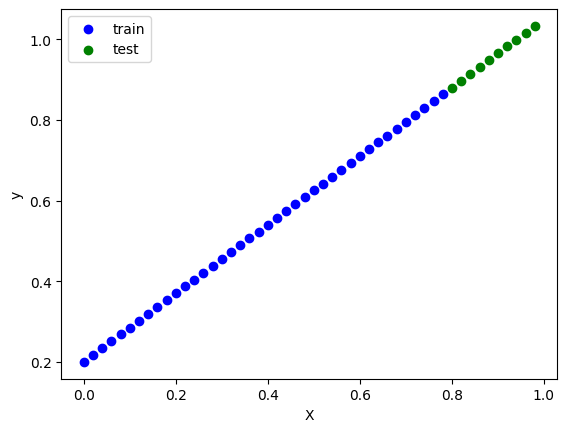

In [7]:
plot_preds()

### Model

In [26]:
## Creat linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    return self.weight * x + self.bias


In [27]:
## create an instance of the model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [32]:
## Making predictions
# with torch.no_grad():
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

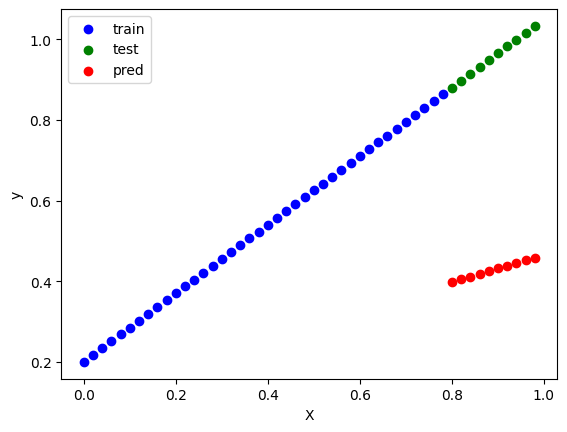

In [33]:
plot_preds(predictions=y_preds)

### Training

In [36]:
# loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [37]:
# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [41]:
## Building a training loop
epochs = 1

for epoch in range(epochs):
  model_0.train()   # set to training mode

  # forward pass
  y_preds = model_0(X_train)

  # loss
  loss = loss_fn(y_preds, y_train)

  # optimize
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descent
  optimizer.step()